# Dataset

A recent medical study suggested that the cerebral blood flow velocity in certain patients
is affected by age. A random sample of patients was obtained and the middle cerebral
artery maximum flow velocity (MFV in cm/sec ) and the age (in years) was measured for
each. The data are given in the table.

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
#from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
dataset=pd.read_csv(io.BytesIO(uploaded['MFV_Age.csv']))

Saving MFV_Age.csv to MFV_Age.csv


In [0]:
X = dataset.sort_values(by='Age', ascending=True)
print(X)

    Sr.No  Age    MFV
16     17   25  68.97
14     15   25  77.33
6       7   28  71.60
12     13   29  78.77
10     11   31  76.63
3       4   37  83.42
17     18   39  72.63
0       1   41  84.84
11     12   42  78.50
9      10   42  79.54
8       9   44  74.82
19     20   45  82.32
4       5   52  67.78
7       8   54  75.13
2       3   58  67.86
15     16   61  74.46
13     14   72  55.45
1       2   74  51.34
18     19   77  54.64
5       6   78  59.57


In [0]:
X = X.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values 
print(X,y)

[[25]
 [25]
 [28]
 [29]
 [31]
 [37]
 [39]
 [41]
 [42]
 [42]
 [44]
 [45]
 [52]
 [54]
 [58]
 [61]
 [72]
 [74]
 [77]
 [78]] [84.84 51.34 67.86 83.42 67.78 59.57 71.6  75.13 74.82 79.54 76.63 78.5
 78.77 55.45 77.33 74.46 68.97 72.63 54.64 82.32]


In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

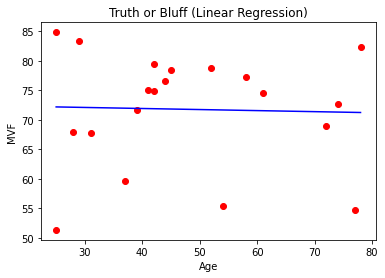

In [0]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Age')
plt.ylabel('MVF')
plt.show()

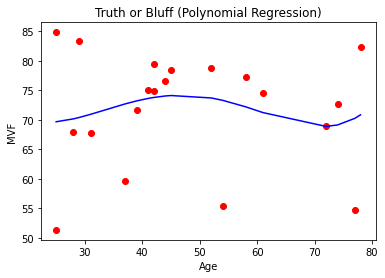

In [0]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') 
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('MVF')
plt.show()
  
plt.show()

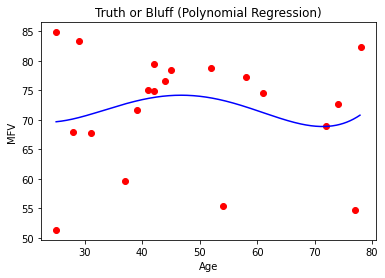

In [0]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('MFV')
plt.show()

In [0]:
# Predicting a new result with Linear Regression 
lin_reg.predict([[65]])

array([71.47174196])

In [0]:
# Predicting a new result with Polynomial Regression 
lin_reg_2.predict(poly_reg.fit_transform([[65]]))

array([69.95405243])

In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, lin_reg_2.predict(poly_reg.fit_transform([[X]]))))
print('R-Squared Value (r2) for Linear Regression :', r2_score(y, lin_reg.predict(X)))

R-Squared Value (r2) for Linear Regression : 0.0010058644943427009


In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, lin_reg_2.predict(poly_reg.fit_transform([[X]]))))
#print('R-Squared Value (r2) for Linear Regression :', r2_score(y, lin_reg.predict(X))
print('R-Squared Value (r2) for Polynomial Regression:', r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X))))
 

R-Squared Value (r2) for Polynomial Regression: 0.03525845528902194
